<a href="https://colab.research.google.com/github/Aleena24/ML_Lab/blob/main/lab5_2348503.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split ,GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score, matthews_corrcoef


1. Data Preprocessing
Encode categorical variables for modeling.

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Check for missing values
is_null = df.isnull()

# Count the number of missing values in each column
missing_values_count = is_null.sum()

# Print the number of missing values in each column
print(missing_values_count)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
# Get the list of categorical variables
categorical_variables = list(df.select_dtypes(include='object').columns)

# Create a label encoder object
le = LabelEncoder()

# Encode the categorical variables
for variable in categorical_variables:
    df[variable] = le.fit_transform(df[variable])

# One-hot encode the categorical variables
df = pd.get_dummies(df, columns=categorical_variables)

print(df)

      SeniorCitizen  tenure  MonthlyCharges  customerID_0  customerID_1  \
0                 0       1           29.85             0             0   
1                 0      34           56.95             0             0   
2                 0       2           53.85             0             0   
3                 0      45           42.30             0             0   
4                 0       2           70.70             0             0   
...             ...     ...             ...           ...           ...   
7038              0      24           84.80             0             0   
7039              0      72          103.20             0             0   
7040              0      11           29.60             0             0   
7041              1       4           74.40             0             0   
7042              0      66          105.65             0             0   

      customerID_2  customerID_3  customerID_4  customerID_5  customerID_6  \
0                0   

Logistic Regression Model Building:
a. Split the dataset into training and testing sets (80% training, 20% testing).
b. Build a baseline logistic regression model using default settings.
c. Train the model on the training data.

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)

KeyError: ignored

Model Evaluation and Visualization:


In [ ]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)
kappa = cohen_kappa_score(y_test, predictions)
matthews = matthews_corrcoef(y_test, predictions)

# Create a confusion matrix
confusion_matrix = confusion_matrix(y_test, predictions)

# Plot the ROC curve
plot_roc_curve(model, X_test, y_test)

# Plot the precision-recall curve
plot_precision_recall_curve(model, X_test, y_test)

# Plot the log loss function curve
plot_log_loss_curve(model, X_train, y_train)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1:', f1)
print('ROC AUC:', roc_auc)
print('Cohen\'s Kappa Score:', kappa)
print('Matthews Correlation Coefficient:', matthews)

NameError: ignored

Sigmoid Curve:

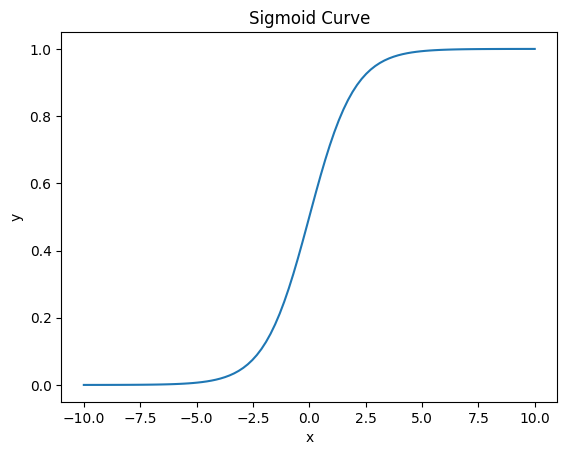

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sigmoid Curve')
plt.show()

Hyperparameter Tuning:
a. Perform hyperparameter tuning to optimize the logistic regression model. Experiment with
different values for at least one hyperparameter.
b. Discuss how hyperparameter tuning affects the model&#39;s

In [ ]:
# Create a dictionary of hyperparameters to try
hyperparameters = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear']
}

# Perform grid search
grid_search = GridSearchCV(model, hyperparameters, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

NameError: ignored